Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
17227776/17225924 [==============================] - 1s 0us/step
調整X_train的圖片尺寸...
調整X_test的圖片尺寸...
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, 7, 7, 1024)        3228864   
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 1024)        0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1024)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)              

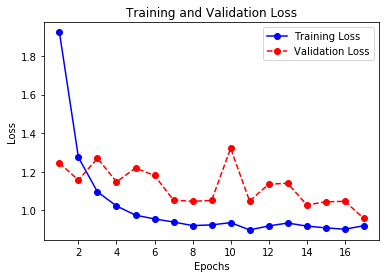

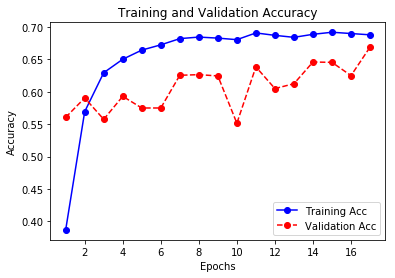

In [1]:
import numpy as np
from keras.datasets import cifar10
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, GlobalAveragePooling2D
from keras.utils import to_categorical
from PIL import Image

# 指定亂數種子
seed = 10
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
# 打亂 2 個 Numpy 陣列
def randomize(a, b):
    permutation = list(np.random.permutation(a.shape[0]))
    shuffled_a = a[permutation]
    shuffled_b = b[permutation]
    
    return shuffled_a, shuffled_b

X_train, Y_train = randomize(X_train, Y_train)
X_test, Y_test = randomize(X_test, Y_test)
# 取出15%訓練, 20%測試
X_train = X_train[:7500]
Y_train = Y_train[:7500]
X_test = X_test[:2000]
Y_test = Y_test[:2000]
# One-hot編碼
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)
# 載入 ResNet50 模型
mobilenet_model = MobileNet(weights="imagenet",
                            include_top=False,
                            input_shape=(224, 224, 3))
# 調整X_train的圖片尺寸
print("調整X_train的圖片尺寸...")
X_train_new = np.array(
  [np.asarray(Image.fromarray(X_train[i]).resize(
          (224, 224))) for i in range(0, len(X_train))])
X_train_new = X_train_new.astype("float32")
# 訓練資料的資料前處理 
train_input = preprocess_input(X_train_new)
# 調整X_test的圖片尺寸
print("調整X_test的圖片尺寸...")
X_test_new = np.array(
  [np.asarray(Image.fromarray(X_test[i]).resize(
          (224, 224))) for i in range(0, len(X_test))])
X_test_new = X_test_new.astype("float32")
# 測試資料的資料前處理
test_input = preprocess_input(X_test_new)
# 定義模型
model = Sequential()
model.add(mobilenet_model)
model.add(Dropout(0.5))
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary()   # 顯示模型摘要資訊
# 凍結上層模型
mobilenet_model.trainable = False
# 編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
# 訓練模型
history = model.fit(train_input, Y_train, 
                    validation_data=(test_input, Y_test), 
                    epochs=17, batch_size=32, verbose=2)
# 評估模型
print("\nTesting ...")
loss, accuracy = model.evaluate(test_input, Y_test)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示圖表來分析模型的訓練過程
import matplotlib.pyplot as plt
# 顯示訓練和驗證損失
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo-", label="Training Loss")
plt.plot(epochs, val_loss, "ro--", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["acc"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_acc"]
plt.plot(epochs, acc, "bo-", label="Training Acc")
plt.plot(epochs, val_acc, "ro--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()